In [1]:
import numpy as np
import pandas as pd

In [138]:
df = pd.read_csv('../../data/dice-results.csv', header=None)
df.columns = ['bias', 'rolls','norm-freq-stddev','roll-1-freq',
    'roll-2-freq','roll-3-freq','roll-4-freq','roll-5-freq','roll-6-freq']
#df.dtypes

In [136]:
df.head(10)

,bias,rolls,norm-freq-stddev,roll-1-freq,roll-2-freq,roll-3-freq,roll-4-freq,roll-5-freq,roll-6-freq
0,random,10,0.235702,0.10000,0.10000,0.200,0.20000,0.10000,0.30000
1,random,10,0.394405,0.20000,0.30000,0.200,0.00000,0.30000,0.00000
2,random,20,0.247207,0.05000,0.20000,0.200,0.20000,0.15000,0.20000
3,random,20,0.459468,0.15000,0.35000,0.100,0.10000,0.25000,0.05000
4,random,40,0.337474,0.07500,0.15000,0.250,0.20000,0.15000,0.17500
5,random,40,0.414997,0.12500,0.27500,0.200,0.07500,0.20000,0.12500
6,random,80,0.380058,0.13750,0.12500,0.250,0.18750,0.13750,0.16250
7,random,160,0.361325,0.15625,0.13125,0.200,0.19375,0.13125,0.18750
8,random,80,0.380058,0.20000,0.17500,0.225,0.10000,0.17500,0.12500
9,random,160,0.455674,0.21250,0.16875,0.200,0.17500,0.13750,0.10625


In [133]:
by_bias_and_rolls = df.groupby(['bias', 'rolls'])

In [29]:
means = by_bias_and_rolls.mean()
means.head()

norm-freq-stddev  roll-1-freq  roll-2-freq  roll-3-freq  \
bias    rolls                                                            
gambler 10             0.272566     0.157143     0.157143     0.185714   
        20             0.195207     0.135714     0.178571     0.185714   
        40             0.221928     0.150000     0.171429     0.189286   
        80             0.205330     0.160714     0.169643     0.185714   
        160            0.196322     0.162500     0.167857     0.167857   

               roll-4-freq  roll-5-freq  roll-6-freq  
bias    rolls                                         
gambler 10        0.200000     0.128571     0.171429  
        20        0.171429     0.164286     0.164286  
        40        0.164286     0.167857     0.157143  
        80        0.164286     0.167857     0.151786  
        160       0.172321     0.171429     0.158036

In [121]:
# mean of grouped by values
gambler_mean_rolls = []
gambler_means = []
fair_mean_rolls = []
fair_means = []
for mi in means.itertuples():
    if mi.Index[0] == 'gambler':
        gambler_mean_rolls.append(mi.Index[1])
        gambler_means.append(mi[1])
    else:
        fair_mean_rolls.append(mi.Index[1])
        fair_means.append(mi[1])

# average of the averages
fair_mean_means = [mean(fair_means)] * len(fair_mean_rolls)
gambler_mean_means = [mean(gambler_means)] * len(gambler_mean_rolls)
        
# not grouped, just all the roll, norm-std-dev pairs        
gambler_rolls = []
gambler_norm_stddevs = []
fair_rolls = []
fair_norm_stddevs = []

for r in df.itertuples():
    if r.bias == 'gambler':
        gambler_rolls.append(r.rolls)
        gambler_norm_stddevs.append(r[3])
    else:
        fair_rolls.append(r.rolls)
        fair_norm_stddevs.append(r[3])


Populating the interactive namespace from numpy and matplotlib


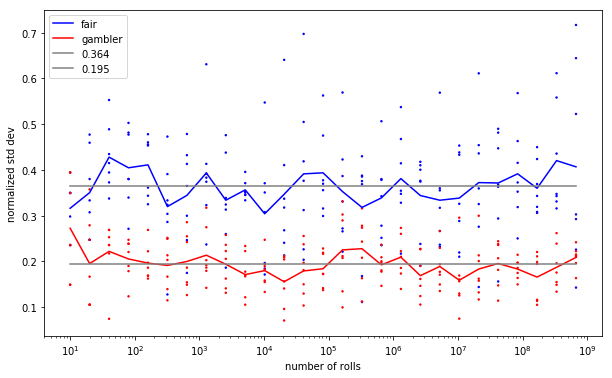

In [132]:
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

import matplotlib.pyplot as plt
plt.xlabel('number of rolls')
plt.ylabel('normalized std dev')
plt.xscale('log')
plt.plot(fair_mean_rolls, fair_means, color='blue', label='fair')
plt.plot(gambler_mean_rolls, gambler_means, color='red', label='gambler')
plt.plot(fair_mean_rolls, fair_mean_means, color='gray', label='%.3f' % fair_mean_means[0])
plt.plot(gambler_mean_rolls, gambler_mean_means, color='gray', label='%.3f' % gambler_mean_means[0])
plt.scatter(fair_rolls, fair_norm_stddevs, color='blue', s=ones(len(fair_rolls))*2)
plt.scatter(gambler_rolls, gambler_norm_stddevs, color='red', s=ones(len(fair_rolls))*2)
plt.legend()

In [137]:
by_bias = df.groupby(['bias'])
by_bias.mean()

,rolls,norm-freq-stddev,roll-1-freq,roll-2-freq,roll-3-freq,roll-4-freq,roll-5-freq,roll-6-freq
bias,,,,,,,,
gambler,4.971027e+07,0.194599,0.164033,0.167266,0.169577,0.168439,0.165903,0.164782
random,4.971027e+07,0.363784,0.164045,0.175104,0.170067,0.165944,0.167405,0.157436
